# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters import Interpreter

In [4]:
import random
random.seed(42)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.9

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

dog    0.977778
cat    0.822222
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

Not implemented


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,prediction_error,dog_prediction,cat_prediction,dog_true,cat_true,confidence,accuracy
15,0.974849,0.974294,0.024597,0,1,0.949698,0.0
42,0.480354,0.998021,0.041271,1,1,0.956750,0.5
13,0.446315,0.997955,0.109414,1,1,0.888541,0.5
6,0.424856,0.956725,0.193563,1,1,0.763162,0.5
22,0.420899,0.999710,0.841508,1,0,0.841218,0.5


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,prediction_error,dog_prediction,cat_prediction,dog_true,cat_true,confidence,accuracy
4,0.272761,0.569367,0.885111,1,1,0.454478,1.0
21,0.285941,0.983189,0.444929,1,1,0.538259,0.5
25,0.222844,0.998535,0.444223,1,0,0.554312,1.0
19,0.178946,0.898556,0.743551,1,1,0.642107,1.0
9,0.171708,0.996720,0.659864,1,1,0.656584,1.0


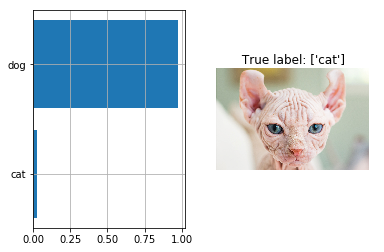

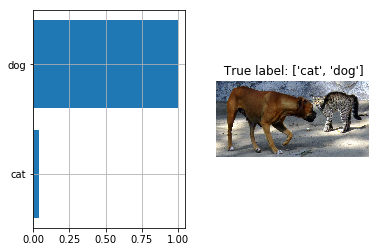

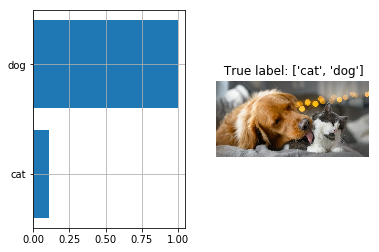

In [15]:
interpreter.plot_most_incorrect_samples(3)

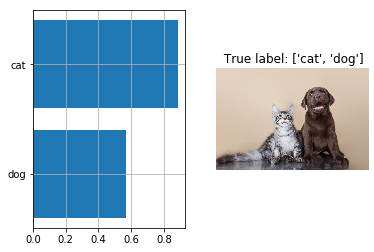

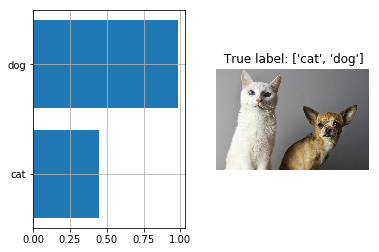

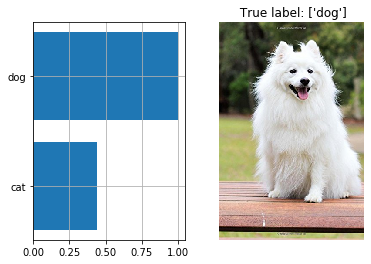

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=44), Output()), _do…